# Standardized Plot Aesthetics with Python

This tutorial provides a guide for creating consistent and publication-ready plots using Matplotlib and Seaborn in Python. We will cover the following topics:

1. Creating a custom Matplotlib style sheet
2. Implementing a Python function to enforce key layout elements


## Creating a Custom Matplotlib Style Sheet

To ensure all group members use a standardized style for plots, we can create a custom Matplotlib style sheet. This style sheet will dictate the aesthetics of the plots, including fonts, colors, line styles, and more.

1. Create a new file named `mystyle.mplstyle`.

2. Add the following parameters to the file:

#Font settings
#Figure and axes settings
axes.linewidth: 8
xtick.major.size: 10
ytick.major.size: 10
xtick.major.width: 2
ytick.major.width: 2
xtick.direction: in
ytick.direction: in
font.size: 30
axes.labelsize: 35
axes.titlesize: 35
lines.linewidth: 2
font.family: Liberation Sans
mathtext.fontset: custom
mathtext.it: STIXGeneral:italic
mathtext.bf: STIXGeneral:italic:bold
figure.figsize: 12, 10
legend.framealpha: 1
legend.fancybox: False

Save the file in your working directory or a central location accessible to you.

Note: The full list of Matplotlib parameters is included in the repo as 'all_params_info.mplstyle'. They are grouped them into categories to make it clearer which settings affect which parts of a plot. Alternatively, you can access this list as a plain text file using:

In [51]:
with open('all_params.mplstyle', 'w') as f:
    for key in plt.rcParams.keys():
        f.write(f'{key}: {plt.rcParams[key]}\n')

## Implementing a Python Function

Now that we have our style sheet, we will implement a Python function that not only applies this style sheet but also enforces key layout elements.

In [52]:
import matplotlib.pyplot as plt
import numpy as np

def apply_custom_style(plot_type, title='', xlabel='', ylabel=''):
    """
    Apply a custom style sheet and enforce layout elements based on the type of plot (spectra, time series, density plot).
    """
    plt.style.use('mystyle.mplstyle')


    # Adjust layout elements based on the plot type
    if plot_type == 'spectra':
        plt.xlabel(xlabel or 'Wavenumber (cm⁻¹)')
        plt.ylabel(ylabel or 'Intensity (a.u.)')
        plt.title(title or 'Vibrational Spectrum')

    elif plot_type == 'time_series':
        plt.xlabel(xlabel or 'Time (s)')
        plt.ylabel(ylabel or 'Amplitude')
        plt.title(title or 'Time Series Data')

    elif plot_type == 'histogram':
        plt.xlabel(xlabel or 'Value')
        plt.ylabel(ylabel or 'Frequency')
        plt.title(title or 'Histogram')

    else:
        raise ValueError(f"Unknown plot type: {plot_type}. Use 'spectra', 'time_series', or 'histogram'.")

def set_plot_limits(xlim_lower = 0, xlim_upper = 4000, ylim_lower= 0, ylim_upper = 0.01 ):
    """ Set plot limits based on the specified side and dynamically adjust the y-limits. """
    plt.yticks([])
    plt.xlim(xlim_lower, xlim_upper)
    plt.ylim(ylim_lower, ylim_upper)

def add_labels(frequencies, avg_intensity_shifted, color, label, label_offset,center_x):
    """ Add labels to each spectrum slightly above the center of the line with matching color. """
    center_x_position = center_x
    center_y_position = np.median(avg_intensity_shifted) + label_offset
    plt.text(center_x_position, center_y_position, label, color=color, 
             fontsize=plt.rcParams['font.size'], va='bottom', ha='center')        

# Simple histogram example

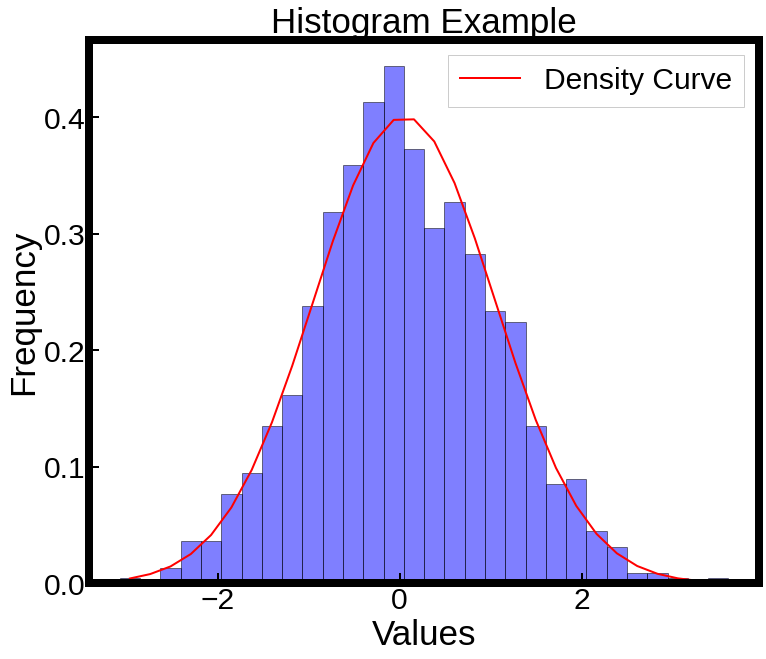

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
data = np.random.randn(1000)  # Generate 1000 random numbers

# Apply custom style
apply_custom_style('histogram', title='Histogram Example', xlabel='Values', ylabel='Frequency')

# Create histogram
count, bins, ignored = plt.hist(data, bins=30, density=True, alpha=0.5, color='blue', edgecolor='black')

# Calculate the center of the bins for the density curve
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Fit a normal distribution to the data for the density curve
mean = np.mean(data)
std_dev = np.std(data)

# Create a density curve using the normal distribution
density_curve = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((bin_centers - mean) / std_dev) ** 2)

# Plot the density curve
plt.plot(bin_centers, density_curve, color='red', linewidth=2, label='Density Curve')

# Show legend
plt.legend()

# Show the plot
plt.show()


# Examples with real data

## Water monomer IR spectra

Let's use our customized stylesheet to create a comparative plot between IR spectra obtained from different simulation methods.

1. Set up specific features of your plot.


In [54]:
# Fixed vertical offset for labels
label_offset = 0.00005

#Vertical separation between spectra
vertical_shift = 0.001

#X position of the labels
label_x_position = 2500 

2. Define a path to the directory containing the data as well as a set of labels

In [55]:
directory = 'water_monomer/600K/'
file_list = [os.path.join(directory, f) for f in [
    'Classical.txt', 'TRPMD.txt', 't10_l0-01.txt', 't10_l0-001.txt', 
    't100_l0-01.txt', 't100_l0-001.txt', 'PMF.txt', 'DVR.txt'
]]

# Labels for the spectra
labels = ['Classical', 'TRPMD', 'PA1', 'PA2', 'PA3', 'PA4', 'Te PIGS', 'Exact']

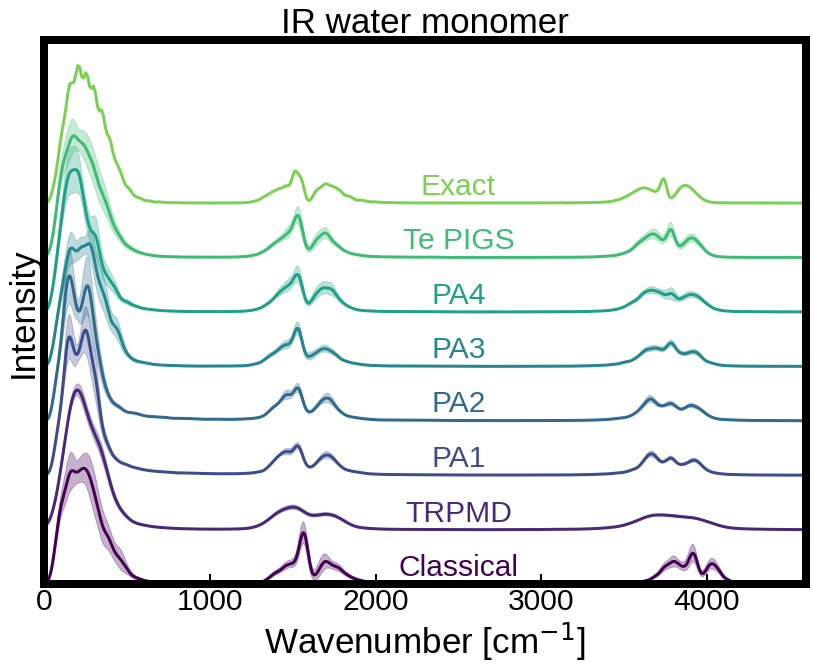

In [56]:
# Subset the viridis colormap to avoid yellow
color_palette = plt.cm.viridis(np.linspace(0, 0.8, len(file_list)))

plt.figure()  # Create the figure here
# Apply custom style function for spectra plot
apply_custom_style('spectra', title='IR water monomer', xlabel='Wavenumber [cm$^{-1}$]', ylabel='Intensity')

set_plot_limits(0,4600,0,0.01)

# Loop over each file
for i, file_in in enumerate(file_list):
    data = np.loadtxt(file_in, skiprows=1)
    frequencies = data[:, 0]
    avg_intensity = data[:, 1]
    
    # Check if the file contains a third column (standard error)
    if data.shape[1] == 3:
        std_error = data[:, 2] / np.sqrt(10)
        avg_intensity_shifted = avg_intensity + i * vertical_shift
        plt.fill_between(frequencies, avg_intensity_shifted - std_error, avg_intensity_shifted + std_error,
                         color=color_palette[i], alpha=0.3)
    else:
        avg_intensity_shifted = avg_intensity + i * vertical_shift
    
    # Plot the mean spectrum
    plt.plot(frequencies, avg_intensity_shifted, linewidth=3, color=color_palette[i])
    
    # Add labels
    add_labels(frequencies, avg_intensity_shifted, color_palette[i], labels[i], label_offset, label_x_position)


# Final plot adjustments
plt.tight_layout()
plt.savefig(f'spectra_plot_monomer_water.png', format='png', bbox_inches='tight', transparent=True, dpi=300)
plt.show()